Vamos a predecir con RandomForest que es un metaestimador, lo que hace es ajustar rl número de árboles clasificadores de decisión en varios subejemplos de la batería de datos y usa la media para mejorar la precisión predictiva y controlar el sobreajuste.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pickle
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit






Aquí importamos los datos de entrenamiento, test y validación.

In [4]:
with open('/content/gdrive/MyDrive/PatronesComportamiento/trainingX.pkl', 'rb') as file:
        X_train=pickle.load(file)
with open('/content/gdrive/MyDrive/PatronesComportamiento/trainingy.pkl', 'rb') as file:
        y_train=pickle.load(file)
with open('/content/gdrive/MyDrive/PatronesComportamiento/testX.pkl', 'rb') as file:
        X_test=pickle.load(file)
with open('/content/gdrive/MyDrive/PatronesComportamiento/testy.pkl', 'rb') as file:
        y_test=pickle.load(file)
with open('/content/gdrive/MyDrive/PatronesComportamiento/validateX.pkl', 'rb') as file:
        X_val=pickle.load(file)
with open('/content/gdrive/MyDrive/PatronesComportamiento/validatey.pkl', 'rb') as file:
        y_val=pickle.load(file)


with open('/content/gdrive/MyDrive/PatronesComportamiento/dataCond.pkl', 'rb') as file:
        X=pickle.load(file)
with open('/content/gdrive/MyDrive/PatronesComportamiento/dataConsec.pkl', 'rb') as file:
        y=pickle.load(file)





with open('/content/gdrive/MyDrive/PatronesComportamiento/mySeriesInten.pkl', 'rb') as file:
        mySeries=pickle.load(file)


Aquí vamos a tener que aplanar las listas pues tan y como se crearon eran listas de listas.

In [ ]:
#aplanamos lista de listas
y_train2 = []
for lista in y_train:
    y_train2.extend(lista)
print(y_train2)

[12.20313, 16.52632, 10.63235, 29.05976, 26.21127, 9.08502, 10.37692, 22.60616, 34.64821, 13.10915, 29.8885, 31.57971, 1.49345, 34.48035, 30.60066, 3.27957, 29.628, 21.5614, 5.215517, 1.826255, 34.72542, 2.638889, 10.74545, 41.26133, 7.452107, 25.64516, 7.16726, 2.52193, 41.51171, 33.744, 30.65493, 15.24211, 8.086206, 3.813433, 3.99322, 15.9, 29.41696, 8.637362, 7.65625, 19.33202, 32.164, 5.059859, 2.302885, 20.03516, 14.76157, 27.76125, 6.512635, 30.02113, 5.419929, 1.842294, 1.942857, 34.08042, 31.79197, 31.49123, 5.39759, 30.20136, 27.96382, 6.307359, 39.46528, 31.77536, 34.18605, 3.445993, 0.5363129, 39.07018, 12.343, 14.47674, 15.17073, 22.43511, 34.70956, 22.5037, 19.30208, 34.48958, 29.57895, 9.893617, 14.44223, 15.39271, 38.02845, 31.80659, 2.814947, 47.21171, 41.02137, 13.49462, 16.54153, 29.49787, 28.50923, 9.126437, 20.79649, 22.49301, 39.88793, 31.36187, 2.567857, 13.43841, 30.24903, 29.488, 33.52797, 31.74453, 1.256757, 30.74319, 8.161049, 5.5, 24.84375, 33.89524, 40.78246

In [ ]:
y2 = []
for lista in y:
    y2.extend(lista)
print(len(y))


196018


En primer lugar tendremos que hacer una separación de los datos entre entrenamiento y test, para ellos utilizaremos el método TimeSeriesSplit de la librería SkLearn(esto ya se hizo en el notebook : [Transformación de datos para predicción](https://colab.research.google.com/drive/1HuCj1Cetas3ffaXV8q83ynGQaV_njtI6?authuser=1)), posteriormente se llevará a cabo una standarización o normalización de los datos y por último aplicaremos la búsqueda en rejilla para obtener la mejor combinación de hiperparámetros para el algoritmo Random Forest.

# TimeSeriesSplit

In [ ]:
regr = RandomForestRegressor(max_depth=5, random_state=0)
scores = cross_val_score(regr, X.values.tolist(), y2, cv=5)




In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': list(range(1, 14))}]


lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  



[ 39204  39205  39206 ... 196015 196016 196017]
        column_name
39204      41.19188
39205      41.59286
39206      40.06642
39207      41.61290
39208      39.36162
...             ...
196013     20.03472
196014     20.03472
196015     20.03472
196016     20.03472
196017     20.03472

[156814 rows x 1 columns]
Train: [ 39204  39205  39206 ... 196015 196016 196017] | test: [    0     1     2 ... 39201 39202 39203]
[     0      1      2 ... 196015 196016 196017]
        column_name
0          1.264151
1          1.132075
2          0.896226
3          1.042453
4          0.665094
...             ...
196013    20.034720
196014    20.034720
196015    20.034720
196016    20.034720
196017    20.034720

[156814 rows x 1 columns]
Train: [     0      1      2 ... 196015 196016 196017] | test: [39204 39205 39206 ... 78405 78406 78407]
[     0      1      2 ... 196015 196016 196017]
        column_name
0          1.264151
1          1.132075
2          0.896226
3          1.042453
4          0

In [ ]:
[regr.fit(X.loc[train,:], 
          y2.loc[train,:].values.ravel()).score(X.loc[test,:],y2.loc[test,:].values.ravel())for train, test in k_fold.split(X)]

[0.9918762268658211,
 0.9929024152690511,
 0.9927187105261475,
 0.9917395008033627,
 0.9924403795228581]

Después de hacer la técnica de validación cruzada observamos que los mejores resultados se obtienen con la segunda configuración. No obstante en un notebook a parte haremos todas las pruebas con los distintos tamaños de ventana posible.

Vamos a predecir todos los valores de test y posteriormente calcular su MAPE para ver que error conseguiríamos.

In [ ]:
y_pred=[]
cont=0
for i in range(len(X_test)):
  y_pred.append(regr.predict([X_test.iloc[i]]))



In [ ]:
mean_absolute_percentage_error(y_test2, y_pred)


0.3887967135767632

Predecimos valores aislados.

In [ ]:
n=3
real_value=y_test2[n]
print(X_train)




print("Valor real: ",real_value)
print("Valor predicho: ",regr.predict([X_test.iloc[n]]))



             0         1          2
232  23.347830  23.01333  24.020000
185  36.606500  34.12275  31.927800
172  30.235850  30.76887  29.202830
198  17.590160  17.75000  17.113820
222  23.110710  24.18214  24.335710
..         ...       ...        ...
91   33.626010  35.78455  38.600000
31    1.786477   1.75089   1.634409
92   38.975000  41.60000  43.867860
161  20.384880  19.78014  20.597940
115  14.034040  14.94043  14.834040

[135780 rows x 3 columns]
Valor real:  28.51307
Valor predicho:  [34.54712286]


Probamos a reconstruir una serie entera.

In [ ]:
w=3
ser=4
lista=[]
i=0
while i < 288-w:
  frag=mySeries[ser][i:i+w]
  lista.extend(frag)
  lista.append(regr.predict([frag])[0])
  i=i+w+2


print(lista)



[1.878543, 1.604938, 1.699588, 3.371369687284796, 1.152263, 1.115226, 0.9835391, 3.371369687284796, 0.8230453, 0.8765432, 1.016461, 3.371369687284796, 0.8024691, 0.8559671, 0.8436214, 3.371369687284796, 0.9176955, 0.5925926, 0.8024691, 3.371369687284796, 0.7942387, 0.5925926, 0.691358, 3.371369687284796, 0.6736402, 0.5271966, 0.6192468, 3.371369687284796, 0.5230126, 0.7698745, 0.5230126, 3.371369687284796, 0.4814815, 0.5390946, 0.6625515, 3.371369687284796, 0.8559671, 0.6131687, 0.7448559, 3.371369687284796, 0.8395061, 0.7983539, 0.8148148, 3.371369687284796, 0.9794239, 1.090535, 1.27572, 3.371369687284796, 1.386831, 1.489712, 1.703704, 3.371369687284796, 2.790123, 3.209877, 3.489712, 3.371369687284796, 4.925926, 5.337449, 5.556, 3.371369687284796, 8.376, 8.236948, 9.246032, 13.669605394400868, 14.73016, 17.52569, 17.72222, 13.669605394400868, 19.93676, 22.6996, 25.24901, 24.47223546661709, 33.50593, 36.51575, 38.3937, 34.54712286294881, 42.6811, 43.64567, 42.41732, 34.54712286294881, 

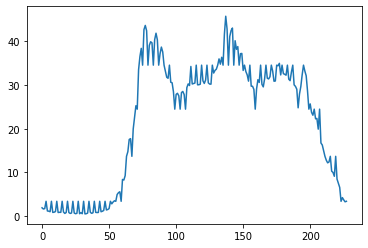

In [ ]:
plt.plot(lista)

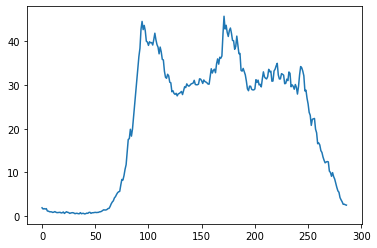

In [ ]:
plt.plot(mySeries[ser])